# Introduction
Welcome to the second NNFL assignment. In this assignment you will be creating a Convolutional Neural Network (CNN) from scratch and creating a pipeline for a Computer Vision task.

Please read the instructions given below carefully before attempting the assignment.  
- Do NOT import any other modules
- Do NOT change the prototypes of any of the functions
- Sample test cases are already given, test your code using these sample cases
- Grading will be based on hidden test cases
- Please solve this notebook using [Google Colab](https://colab.research.google.com/) as the required packages are already installed



Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE`, as well as your name and ID number below:

In [1]:
NAME = "Omkar R Durgada" 
ID = "2020A3PS0460P"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

# 1. Convolutional Neural Networks
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning method that can take an input image, assign importance (learnable weights and biases) to distinct aspects/objects in the image, and distinguish one from the other. When compared to other classification methods, ConvNet requires substantially less pre-processing. While filters in primitive approaches are hand-engineered, ConvNets can learn these filters/characteristics with adequate training.

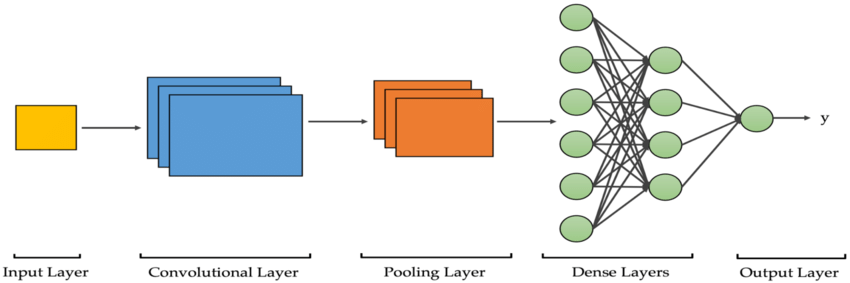


# 2. Convolutional Layer
In this section, you will construct each step of the convolution layer. First, you'll write two helper functions: one for zero padding and one for computing the convolution function itself.

## 2.1 Zero Padding

Convolutional layers decrease the output size. Padding layers can be used in situations where we want to expand the output size while keeping the information provided in the corners. Padding works by adding extra rows and columns to the images' outer dimensions. As a result, the size of the input data and the output data will remain similar.
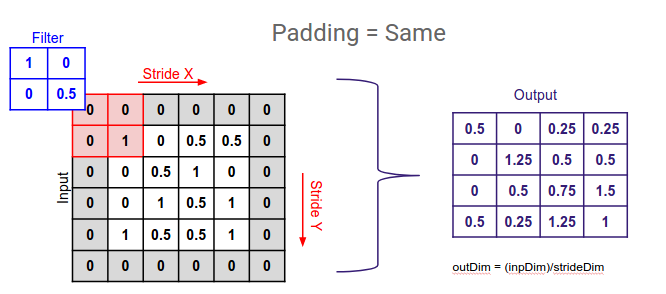

**Task:** Implement the given function which takes input a batch of images and outputs a batch of padded images

In [3]:
def pad_image(X, pad):
    """
    Pad all the images in the given batch X with zeros. Apply padding only to the height and width of the images, not the channels

    Parameters:
    X (np.array): numpy array of shape (num_images, height, width, num_channels)

    pad (int): amount of padding to add to the vertical and horizontal dimensions 

    Returns:
    X_pad (np.array): numpy array of shape (num_images, height+2*pad, width+2*pad, num_channels) containing padded images
    """
    #YOUR CODE HERE
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), "constant")

    return X_pad

In [4]:
X = np.random.randn(4, 32, 32, 3)
pad = 2
X_pad = pad_image(X, pad)
assert X_pad.shape == (4, 36, 36, 3) 
print('Sample Test cases passed')

Sample Test cases passed


In [5]:
#HIDDEN TEST CASES DO NOT MODIFY

## 2.2 Convolution Single Step
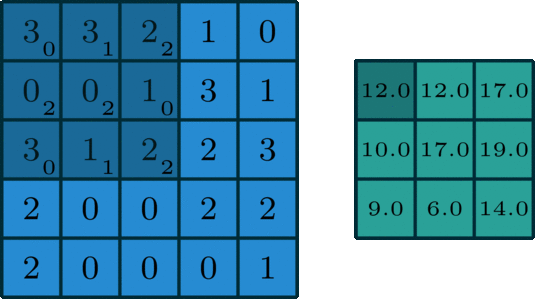

**Task:** In this function, given a slice of the input volume, apply a single filter to the slice. For the above you need to:


1.   Apply the filter to each and every position of the input
2.   Output a new volume of a different size than the input



In [6]:
def conv_single_step(X_slice, W, b):
    """
    Apply a filter of size to a slice of the same height and width as the previous dimension to the output of the previous activation layer.

    Parameters:
    X_slice (np.array): numpy array of shape (filter_size, filter_size, num_channels) containing the output of previous activation layer
    W (np.array): numpy array of shape (filter_size, filter_size, num_channels) containing weight parameters
    b (np.array): numpy array of shape (1, 1, 1) containing the bias parameter

    Returns:
    Z (float): a scalar value, containing the result of convolving the filter with the slice
    """
    #YOUR CODE HERE
    # Element-wise product between a_slice and W. Do not add the bias yet.
    s = np.multiply(X_slice, W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)

    return Z

In [7]:
X_slice = np.random.randn(3, 3, 3)
W = np.random.randn(3, 3, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(X_slice, W, b)

assert (Z.dtype == np.float64 or Z.dtype == np.float32)

print('Sample Test cases passed')

Sample Test cases passed


In [8]:
#HIDDEN TEST CASES DO NOT MODIFY

## 2.3 Implement Forward Pass
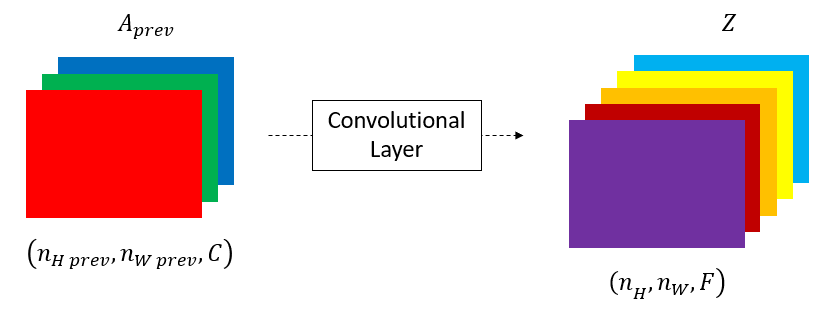

**Task:** Implement a function that takes the input from the previous layer and applies multiple filters to it. For the above, you need to:

1.   Loop over the batch of training examples
2.   Apply all the filters to the current training example
3.   Produce output after applying the filters
4.   Stack the outputs to create the new output volume


**NOTE:** DO NOT forget to pad the input volume before convolving

In [9]:
def conv_forward(X_prev, W, b, stride, pad):
    """
    Implement the forward propagation for a single Convolutional layer

    Parameters:
    X_prev (np.array): numpy array of shape (m, height_prev, width_prev, num_channels_prev) containing outputs after activation of the previous layer
    W (np.array): numpy array of shape (filter_size, filter_size, num_channels_prev, num_channels) containing the weights of the layer
    b (np.array): numpy array of shape (1, 1, 1, num_channels) containing the biases of each channel
    stride (int): integer denoting the stride to be used for the filters
    pad (int): integer denoting the amount of padding to be used for the volume

    Returns:
    Z (np.array): output of the convolutional layer of shape (m, height, width, num_channels)
    """
    #YOUR CODE HERE
    # Retrieve dimensions from A_prev's shape (≈1 line)
    (m, n_H_prev, n_W_prev, n_C_prev) = X_prev.shape

    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape

    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + (2 * pad)) / stride + 1)
    n_W = int((n_W_prev - f + (2 * pad)) / stride + 1)

    Z = np.zeros((m, n_H, n_W, n_C))

    # Create A_prev_pad by padding A_prev
    A_prev_pad = pad_image(X_prev, pad)

    for i in range(m):  # loop over the batch of training examples
        a_prev_pad = X_prev[i]  # Select ith training example's padded activation
        for h in range(n_H):  # loop over vertical axis of the output volume
            for w in range(n_W):  # loop over horizontal axis of the output volume
                for c in range(n_C):  # loop over channels (= #filters) of the output volume

                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = stride * h
                    vert_end = stride * h + f
                    horiz_start = stride * w
                    horiz_end = stride * w + f

                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = A_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]

                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

    return Z

In [10]:
X_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
stride = 2
pad = 1

Z = conv_forward(X_prev, W, b, stride, pad)

assert Z.shape == (10, 3, 4, 8)

print('Sample test cases passed')

Sample test cases passed


# 3. Pooling Layer
The output feature maps have the drawback of being sensitive to the positioning of the features in the input. Downsampling the feature maps is one method to deal with this sensitivity. As a result, the down sampled feature maps that are produced are more resilient to changes in the position of the feature in the picture, also known as "local translation invariance" in technical terms.
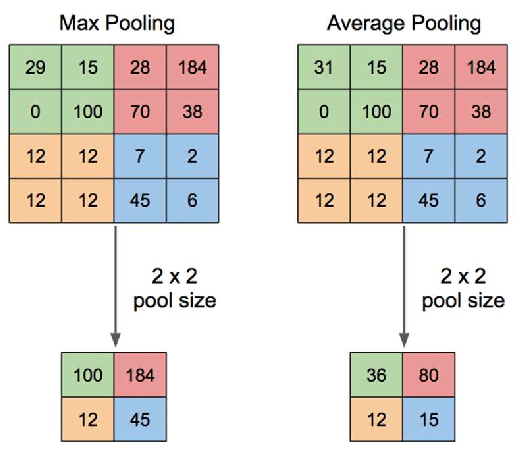

**Task:** Implement a function that takes the output of previous activation layer and implements both average and max pooling


*   **Max pooling:** slides a window over the input and stores the max value of the window in the output.
*   **Average pooling:** slides a window over the input and stores the average value of the window in the output



In [11]:
def pool_forward(X_prev, filter_size, stride, mode='max'):
    """
    Implement a forward pass through a pooling layer. This can implement either max pooling or average pooling

    Parameters:
    X_prev (np.array): numpy array of shape (m, height_prev, width_prev, num_channels_prev) containing outputs after activation layer
    filter_size (int): integer denoting the filter size for pooling 
    stride (int): integer denoting the stride to be used for kernels
    mode (string): pooling mode that we are using, can be 'max' or 'avg'

    Returns:
    Z (np.array): numpy array of shape (m, height, width, num_channels_prev) containing output after applying pooling
    """
    #YOUR CODE HERE
    (m, n_H_prev, n_W_prev, n_C_prev) = X_prev.shape

    # Retrieve hyperparameters from "hparameters"
    f = filter_size

    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### START CODE HERE ###
    for i in range(m):  # loop over the training examples
        for h in range(n_H):  # loop on the vertical axis of the output volume
            for w in range(n_W):  # loop on the horizontal axis of the output volume
                for c in range(n_C):  # loop over the channels of the output volume

                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = stride * w
                    vert_end = stride * w + f
                    horiz_start = stride * h
                    horiz_end = stride * h + f

                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = X_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    return A

In [12]:
X_prev = np.random.randn(2, 5, 5, 3)
filter_size = 3
stride = 2

Z = pool_forward(X_prev, filter_size, stride)

assert Z.shape == (2, 2, 2, 3)

print('Sample test cases passed')

Sample test cases passed
